In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Matplotlib is building the font cache; this may take a moment.


In [3]:
players = pd.read_csv("../data/cleaned/players.csv")
# Player data, relevent data Name, Position, NflId
players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [4]:
print(len(players))
# Number of player include
players.describe()

1697


,nflId,weight
count,1697.000000,1697.000000
mean,48237.157336,245.774308
std,5230.066814,47.256005
min,25511.000000,153.000000
25%,44830.000000,205.000000
50%,47874.000000,236.000000
75%,53476.000000,291.000000
max,55241.000000,380.000000


In [5]:
plays = pd.read_csv("../data/cleaned/player_play.csv")
# Play by play set, relevent data Passing Yards, Team Abbreviation, Game Id, Nfl ID
plays.head()

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,passingYards,sackYardsAsOffense,hadPassReception,receivingYards,wasTargettedReceiver,fumbles,quarterbackHit,tackleForALoss,penaltyYards,routeRan
0,2022090800,56,35472,BUF,0,0,0,0,0,0,0,0,0,0,0,NaN
1,2022090800,56,42392,BUF,0,0,0,0,0,0,0,0,0,0,0,NaN
2,2022090800,56,42489,BUF,0,0,0,0,1,6,1,0,0,0,0,IN
3,2022090800,56,44875,BUF,0,0,0,0,0,0,0,0,0,0,0,NaN
4,2022090800,56,44985,BUF,0,0,0,0,0,0,0,0,0,0,0,OUT


In [6]:
print(len(plays))
# Number of plays for each palyer involed

plays.describe()

354727


,gameId,playId,nflId,hadRushAttempt,rushingYards,passingYards,sackYardsAsOffense,hadPassReception,receivingYards,wasTargettedReceiver,fumbles,quarterbackHit,tackleForALoss,penaltyYards
count,3.547270e+05,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000
mean,2.022099e+09,2023.833091,47437.201033,0.019136,0.087304,0.173268,-0.011471,0.015857,0.173373,0.023601,0.000761,0.003986,0.003270,0.006614
std,5.979081e+03,1182.056487,5167.218156,0.137003,1.098183,1.840473,0.309496,0.124923,1.841174,0.151803,0.027680,0.063010,0.057091,0.291174
min,2.022091e+09,54.000000,25511.000000,0.000000,-10.000000,-10.000000,-18.000000,0.000000,-11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.022093e+09,996.000000,43426.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.022101e+09,2017.000000,46457.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.022102e+09,3022.000000,52590.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.022111e+09,5120.000000,55241.000000,1.000000,75.000000,98.000000,0.000000,1.000000,98.000000,1.000000,2.000000,1.000000,1.000000,20.000000


In [7]:
games = pd.read_csv("../data/cleaned/games.csv")
# Each game player (out of 9 weeks included) relevent data Home Team, Visitor Team, Home Final Score, Visitor Final Score

In [8]:
players_by_play = pd.merge(players, plays, on='nflId')
# Combine player data to plays data by there NFL ID
players_by_play.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,gameId,playId,teamAbbr,...,passingYards,sackYardsAsOffense,hadPassReception,receivingYards,wasTargettedReceiver,fumbles,quarterbackHit,tackleForALoss,penaltyYards,routeRan
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,2022091113,413,TB,...,24,0,0,0,0,0,0,0,0,NaN
1,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,2022091113,444,TB,...,0,0,0,0,0,0,0,0,0,NaN
2,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,2022091113,465,TB,...,20,0,0,0,0,0,0,0,0,NaN
3,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,2022091113,489,TB,...,0,0,0,0,0,0,0,0,0,NaN
4,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,2022091113,510,TB,...,0,0,0,0,0,0,0,0,0,NaN


In [9]:
# functions to create new df based on specific requirements
def sort_by_position(position):
    return players_by_play[players_by_play["position"] == position]
def sort_by_player(name):
    return players_by_play[players_by_play["displayName"] == name]

In [10]:
def find_stat_per_game(name, stat):
    # returns the average stat of a specific player
    player_df = sort_by_player(name)
    return sum(player_df[stat])/np.count_nonzero(player_df["gameId"].unique())



In [11]:
# find best QB by average passing yards
all_QB = sort_by_position("QB")["displayName"].unique()
best_QB = all_QB.item(0)
for QB in all_QB:
    if (find_stat_per_game(QB, "passingYards") > find_stat_per_game(best_QB, "passingYards")):
        best_QB = QB

best_QB, find_stat_per_game(best_QB, "passingYards")

('Patrick Mahomes', 320.125)

In [12]:
print(players_by_play["displayName"].unique())

# helper function to compute the average of any stat and player name and the scores of the games in a DataFrame
def avg_stat_vs_team(name, stat):
    player_df = sort_by_player(name)
    # Assignment
    games_played, vis_team, vis_score, home_team, home_score = [], [], [], [], []

    for game in player_df["gameId"].unique():

        games_df = games[games["gameId"] == game]

        # Append data to new organized Data Frame 
        vis_team = np.append(vis_team, games_df["visitorTeamAbbr"])
        vis_score =np.append(vis_score, games_df["visitorFinalScore"])
        home_team = np.append(home_team, games_df["homeTeamAbbr"])
        home_score =np.append(home_score, games_df["homeFinalScore"])
        stat_df = player_df[player_df["gameId"] == game]
        stats = sum(stat_df[stat])
        games_played = np.append(games_played, stats)
    
    # create DataFrame used to hold all player data
    val_df = pd.DataFrame({
    "Home Team": home_team,
    "Home Score": home_score,
    "Away Team": vis_team,
    "Away Score": vis_score,
    stat: games_played
    })

    return val_df


avg_stat_vs_team("Aaron Rodgers", "passingYards")


['Tom Brady' 'Jason Peters' 'Aaron Rodgers' ... 'Prince Emili'
 "Ja'Marcus Ingram" 'C.J. Brewer']


,Home Team,Home Score,Away Team,Away Score,passingYards
0,MIN,23.0,GB,7.0,169.0
1,GB,27.0,CHI,10.0,225.0
2,TB,12.0,GB,14.0,226.0
3,GB,27.0,NE,24.0,251.0
4,GB,22.0,NYG,27.0,222.0
5,GB,10.0,NYJ,27.0,246.0
6,WAS,23.0,GB,21.0,195.0
7,BUF,27.0,GB,17.0,203.0
8,DET,15.0,GB,9.0,241.0


In [13]:
all_passing_yards = []
names = []
for name in players_by_play["displayName"].unique():
    yards = find_stat_per_game(name, "passingYards")
    all_passing_yards = np.append(all_passing_yards, yards)
    if(yards > 100):
        names = np.append(names, name)

# removing all throwing yards under 100 per game to remove most backup QB's and other player who barely passed
relative_passing_yards = all_passing_yards[all_passing_yards > 100]
print(all_passing_yards)

[268.22222222   0.         219.77777778 ...   0.           0.
   0.        ]


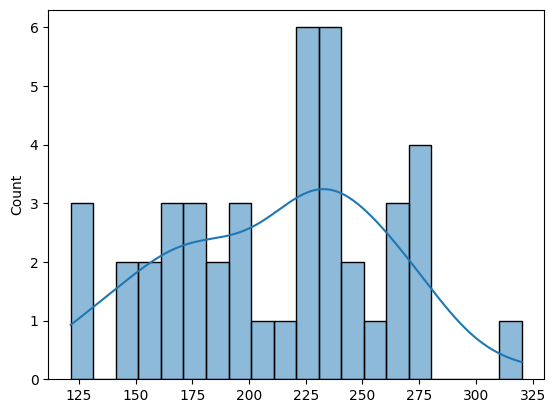

In [14]:
# create a histogram of passing yards of the QB's with the threshold line of 237.5 with was the 2023 average passing yards per game
sns.histplot(relative_passing_yards, binwidth=10, kde=True)
plt.show()

In [15]:
#Using a positive point diff for the players with passing yards is winning and negative if the player with passing yards is losing
def get_main_team(player_games):
    # finds majority team for a given player
    for team in player_games["Home Team"]:
        if (player_games["Away Team"][0] == team):
            return player_games["Away Team"][0]
    
    return player_games["Home Team"][0]

def organize_teams_df(player_games):
    player_game = player_games
    main_team = get_main_team(player_games)
    index = 0

    for team in player_games["Home Team"]:
        if (team != main_team):
            # swap Home and away if the home team is not the main team
            player_games.loc[index, "Home Team"] = player_games.loc[index, "Away Team"]
            player_games.loc[index, "Away Team"] = team

            val_score = player_games["Home Score"][index]
            player_games.loc[index, "Home Score"] = player_games.loc[index, "Away Score"]
            player_games.loc[index, "Away Score"] = val_score

        index = index + 1
    player_game.insert(4, "Point Differental", (player_game["Home Score"] - player_game["Away Score"]))
    return player_game


def scatter_pointdiff_passing_yards(name):
    # output a DataFrame of the points differental and the passing yard by the QB in a game
    all_QB_point_diff = []
    all_QB_passing = []
    player_games = organize_teams_df(avg_stat_vs_team(name, "passingYards"))
    print(player_games)
    # displays a scatterplot of the players giving the score differental verses the passing yards of the game
    sns.scatterplot(x=player_games["passingYards"], y=(player_games["Home Score"]-player_games["Away Score"]))

    # Add all of the games to df with passing yards and point diff
    for game_point_diff in player_games["Point Differental"]:
        all_QB_point_diff = np.append(all_QB_point_diff, game_point_diff)
    for game_yards in player_games["passingYards"]:
        all_QB_passing = np.append(all_QB_passing, game_yards)
    
    return pd.DataFrame([all_QB_point_diff, all_QB_passing])


Tom Brady
  Home Team  Home Score Away Team  Away Score  Point Differental  passingYards
0        TB        19.0       DAL         3.0               16.0         207.0
1        TB        20.0        NO        10.0               10.0         190.0
2        TB        12.0        GB        14.0               -2.0         267.0
3        TB        31.0        KC        41.0              -10.0         360.0
4        TB        21.0       ATL        15.0                6.0         307.0
5        TB        18.0       PIT        20.0               -2.0         243.0
6        TB         3.0       CAR        21.0              -18.0         263.0
7        TB        22.0       BAL        27.0               -5.0         320.0
8        TB        16.0        LA        13.0                3.0         257.0
Aaron Rodgers
  Home Team  Home Score Away Team  Away Score  Point Differental  passingYards
0        GB         7.0       MIN        23.0              -16.0         169.0
1        GB        27.0     

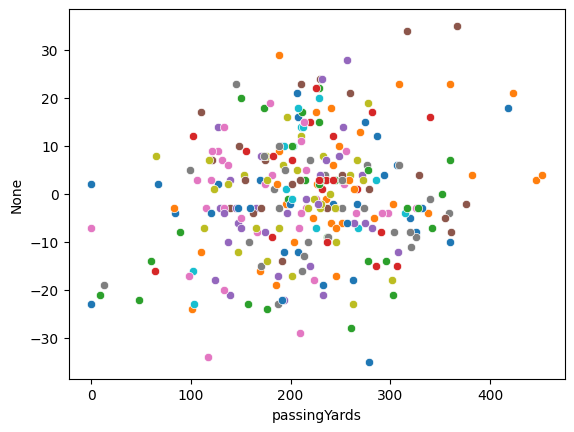

In [16]:
games_df = pd.DataFrame()
for name in names:
    print(name)
    # create a df of the all of the QBs with they point diff in a game and the passing yards they through
    games_df = pd.concat([games_df, scatter_pointdiff_passing_yards(name)], ignore_index=True)

games_df = games_df.T

In [17]:

def stack_data(data):

    # Return stacked data of two variables
    passing_yards = data.iloc[:, 1::2].rename_axis(columns='Passing Yards').stack().dropna(how='any').reset_index(drop = True)
    point_diff = data.iloc[:, 0::2].rename_axis(columns='Point Diff').stack().dropna(how='any').reset_index(drop = True)
    return pd.DataFrame({'Point Diff': point_diff, 'Passing Yards': passing_yards})

def su(any_numbers):
    
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers) 

cleaned = stack_data(games_df)

su_data = pd.DataFrame({"Passing Yards" : su(cleaned['Passing Yards'].to_numpy()), "Point Diff" : su(cleaned['Point Diff'].to_numpy())})

def correlation(data, col1, col2):
    return np.mean(su(data[col1])*su(data[col2]))

print("\n", correlation(cleaned, "Passing Yards", "Point Diff"))



 0.1725238123368147


A correlation of .17 is not very convincing of Correlation

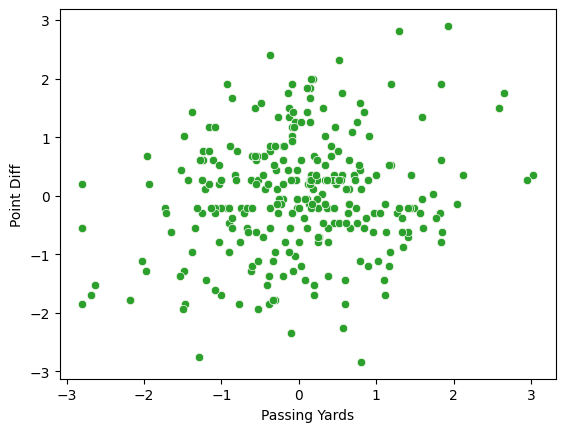

In [18]:
for name in names:
    sns.scatterplot(x=(su_data["Passing Yards"]), y=su_data["Point Diff"])

Does having more passing yards per game result in winning more. Run a regression of passing yards to point differentals.

In [19]:
def linear_regression(data, col1, col2):

    # Define Model
    model = LinearRegression()

    model.fit(data[[col1]], data[col2])

    # Return slope and Intercept
    intercept = model.intercept_
    slope = model.coef_[0]
    return slope, intercept


def prediction(data, col1, col2, x_val):

    # One prediction
    s_i = linear_regression(data, col1, col2)

    return float(s_i[0] * x_val + s_i[1])

prediction(cleaned, "Passing Yards", "Point Diff", 300)

1.8798255295550383

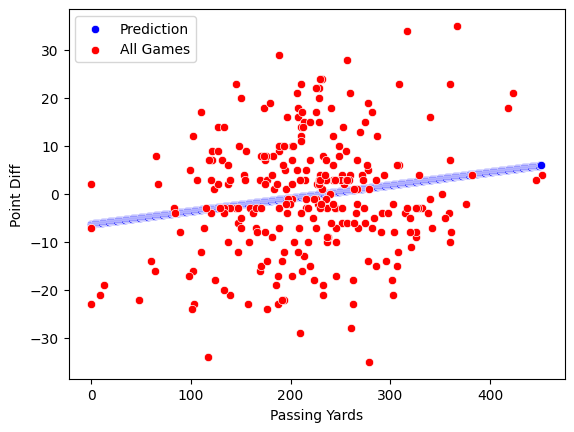

,Passing Yards,Point Diff
0,0.0,-6.252606
1,1.0,-6.225498
2,2.0,-6.198390
3,3.0,-6.171282
4,4.0,-6.144174
...,...,...
447,447.0,5.864717
448,448.0,5.891825
449,449.0,5.918933
450,450.0,5.946041


In [20]:
def all_prediction(data, col1, col2):
    all_data = pd.DataFrame()

    # Define least and most throwing yards in a game
    bottom_count, top_count = cleaned[col1].min(), cleaned[col1].max()

    # loop though all value between floor and ceiling
    for yards in np.arange(bottom_count, top_count):
        temp_data = pd.DataFrame({col1: [yards], col2: [prediction(data, col1, col2, yards)]})
        all_data = pd.concat([all_data, temp_data], ignore_index=True)
    
    # Plot Graph with both best fit linear line and all Games
    fig, ax = plt.subplots()
    sns.scatterplot(data=all_data, x=(all_data[col1]), y=all_data[col2], ax=ax, color='blue', label='Prediction')
    sns.scatterplot(data=data, x=(data[col1]), y=data[col2], ax=ax, color='red', label='All Games')
    plt.legend()
    plt.show()

    # Output all of the possible point Differentials
    return all_data

all_prediction(cleaned, "Passing Yards", "Point Diff")